In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.cluster import DBSCAN
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Breast Cancer Dataset (from scikit-learn):

Binary classification dataset.
Features describe characteristics of cell nuclei present in breast cancer biopsies.

For the Breast Cancer dataset, the **target** variable is binary:

0 typically represents benign tumors. (good)

1 typically represents malignant tumors.  (bad)


**Features**

1. Mean Radius:

The mean of distances from the center to points on the perimeter.
Represents the average size of the radius of the nuclei.

2. Mean Texture:

The mean gray-scale intensity values of the pixels in the image.
Represents the average texture or smoothness of the cell nuclei.


3. Mean Perimeter:

The mean size of the nuclei's perimeter.
Reflects the average length of the boundary of the cell nuclei.

4. Mean Area:

The mean size of the nuclei's area.
Represents the average area occupied by the cell nuclei.

5. Mean Smoothness:

The mean of local variation in radius lengths.
Describes the smoothness of the cell nuclei.

6. Mean Compactness:

The mean of perimeter^2 / area - 1.0.
Measures how compact the shape of the cell nuclei is.
7. Mean Concavity:

The mean severity of concave portions of the contour.
Indicates the degree of concavity in the boundary of the cell nuclei.
8. Mean Concave Points:

The mean number of concave portions of the contour.
Measures the number of concave points in the boundary of the cell nuclei.
9. Mean Symmetry:

The mean symmetry of the cell nuclei.
Reflects how symmetric the cell nuclei are.
10. Mean Fractal Dimension:

The mean fractal dimension of the cell nuclei.
Describes the complexity of the cell nuclei shape.

11-20. Standard Error (se) Features:
- For each of the mean features mentioned above, there are corresponding standard error features, denoted by adding "se" as a prefix. For example, se radius, se texture, etc.

21-30. Worst Features:
- Similar to the mean and standard error features, there are corresponding "worst" features representing the worst or largest values among the measurements. For example, worst radius, worst texture, etc.

Dimenssion of the whole dataset is 569*30

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

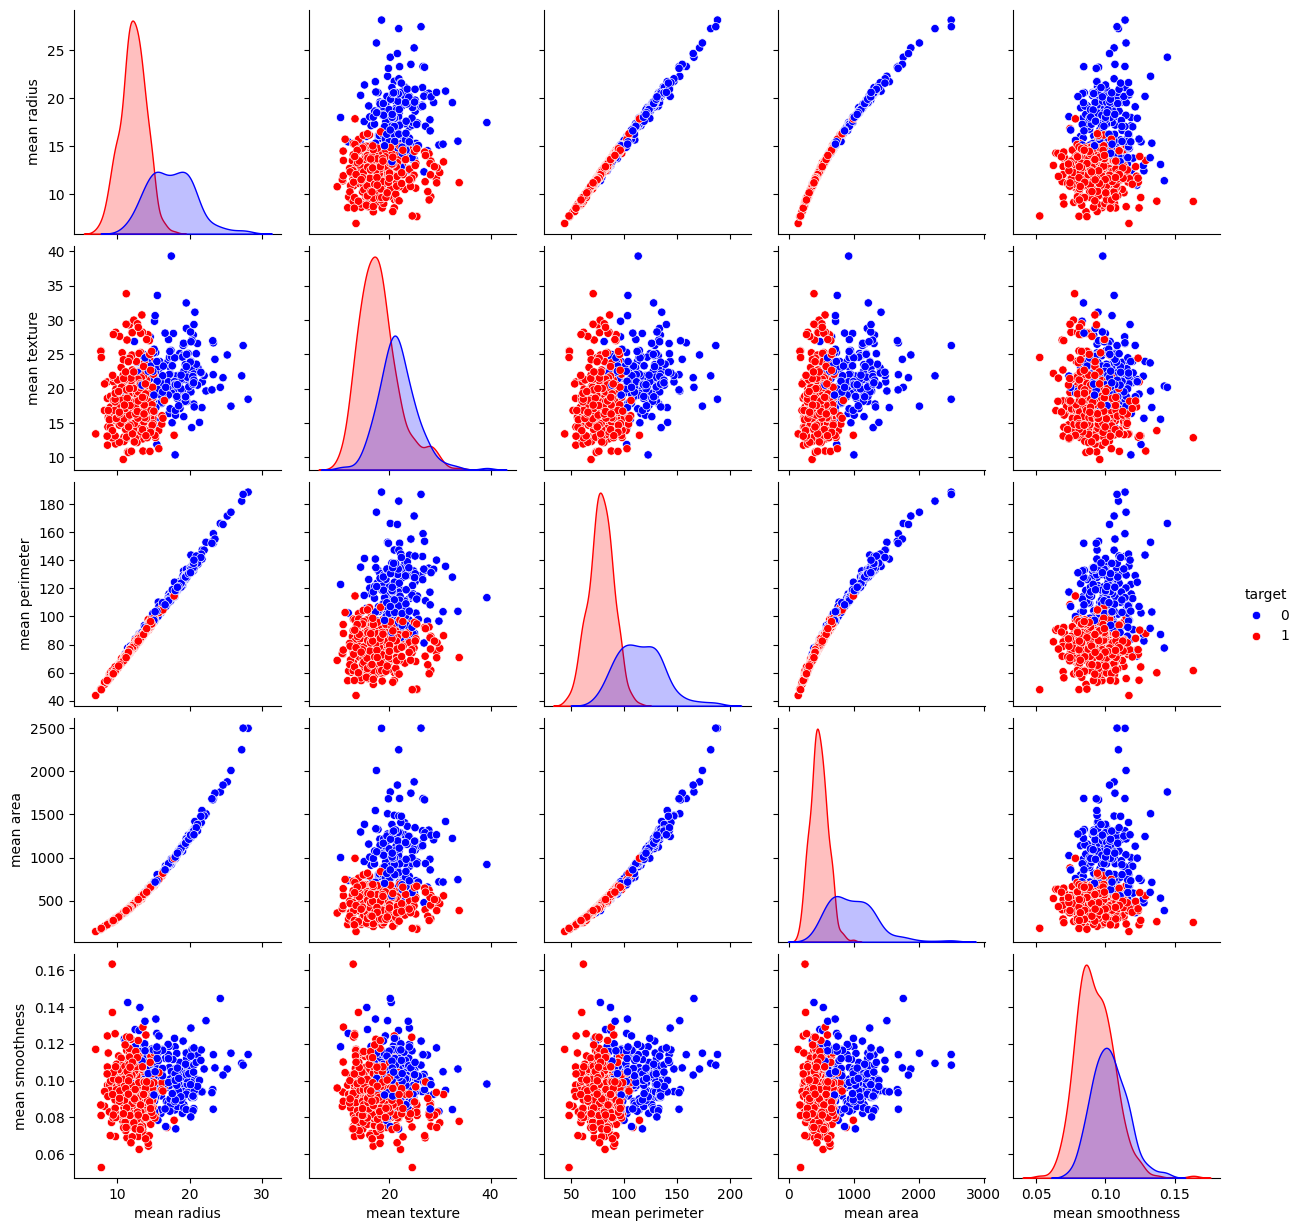

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load Breast Cancer dataset
breast_cancer = load_breast_cancer()

# Create a DataFrame with features and target
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target

# Display the first few rows of the dataset
print(df.head())

# Select a subset of features for visualization (you can customize this)
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

# Add the target variable to the selected features
selected_features_with_target = selected_features + ['target']

# Subset the DataFrame with selected features
df_subset = df[selected_features_with_target]

# Plot pair plots colored by target variable
sns.pairplot(df_subset, hue='target', palette={0: 'blue', 1: 'red'})
plt.show()


In [16]:
data = breast_cancer.data
labels = breast_cancer.target

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
data_scaled = scaler.fit_transform(data)

In [ ]:
data.shape

(569, 30)

first I used clustering(K-means) for the test data without autoencoder

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train Clustering Accuracy: 0.09649122807017543


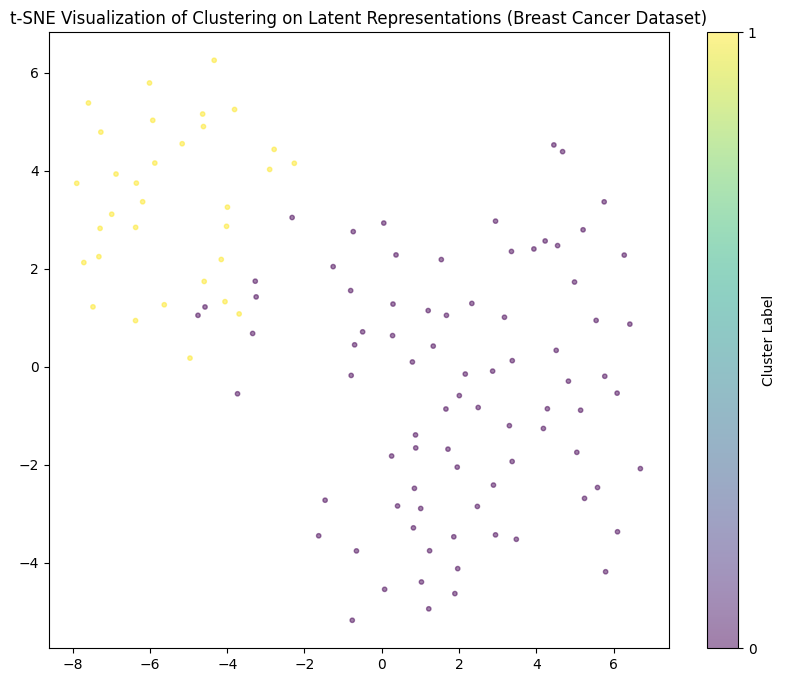

In [4]:
# Use K-Means clustering on the raw test data
kmeans = KMeans(n_clusters=2, random_state=42)
clustered_labels = kmeans.fit_predict(x_test_scaled)

# Apply t-SNE to reduce dimensionality for visualization
tsne = TSNE(n_components=2, random_state=42)
embedded = tsne.fit_transform(x_test_scaled)

# Evaluate clustering accuracy using true labels
train_accuracy = accuracy_score(y_test, clustered_labels)

print("Train Clustering Accuracy:", train_accuracy)

# Plot the clustered points
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedded[:, 0], embedded[:, 1], c=clustered_labels, cmap='viridis', s=10, alpha=0.5)
plt.title('t-SNE Visualization of Clustering on Latent Representations (Breast Cancer Dataset)')
plt.colorbar(scatter, ticks=range(2), label='Cluster Label')
plt.show()


t-SNE (t-Distributed Stochastic Neighbor Embedding) یک الگوریتم کاهش ابعاد (dimensionality reduction) است که از اهمیت زیادی در تجزیه و تحلیل داده‌های پیچیده و تصویری، به ویژه در زمینه تجزیه و تحلیل الگوها و تصاویر، برخوردار است. این الگوریتم توسط Geoffrey Hinton و Laurens van der Maaten ارائه شده است.

برای نمایش خوشه بندی از این الگوریتم استفاده کردم و محور افقی  عمودی مولفه اول و دوم t-sne است.

که به نحوی یک بازنمایی جدید از داده هاست.

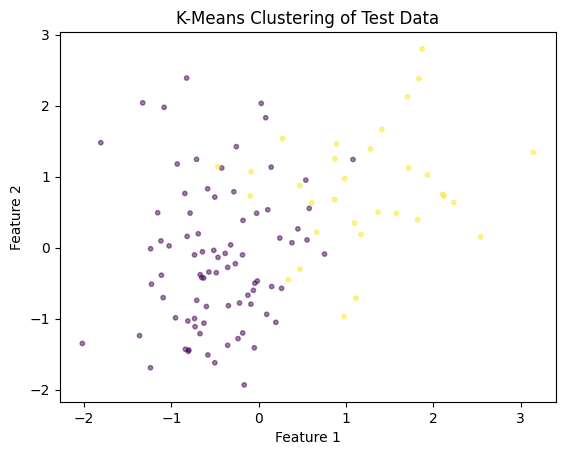

In [ ]:
features_for_visualization = x_test_scaled[:, :2]

# Plotting the clusters in a scatter plot
plt.scatter(features_for_visualization[:, 0], features_for_visualization[:, 1], c=clustered_labels, cmap='viridis', s=10, alpha=0.5)
plt.title('K-Means Clustering of Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


اینجا هم داده ها رو با استفاده از ویژگی اول و دوم نمایش دادم.

the result is awful its 9%

In [5]:
# Define the autoencoder model
input_dim = x_train_scaled.shape[1]

autoencoder = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(30, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(input_dim, activation='sigmoid')
])
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 30)                1950      
                                                                 
 dense_3 (Dense)             (None, 64)                1984      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 30)                3870      
                                                                 
Total params: 28348 (110.73 KB)
Trainable params: 28348 

In [6]:
# Train the autoencoder
history = autoencoder.fit(x_train_scaled, x_train_scaled, epochs=50, batch_size=32, shuffle=True, validation_data=(x_test_scaled, x_test_scaled))

Epoch 1/50
15/15 [==============================] - 1s 14ms/step - loss: 1.2153 - val_loss: 1.0385
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 0.9693 - val_loss: 0.7464
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.7789 - val_loss: 0.6672
Epoch 4/50
15/15 [==============================] - 0s 5ms/step - loss: 0.7188 - val_loss: 0.6302
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6776 - val_loss: 0.6136
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6579 - val_loss: 0.6024
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6460 - val_loss: 0.5937
Epoch 8/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6398 - val_loss: 0.5868
Epoch 9/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6337 - val_loss: 0.5777
Epoch 10/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6259 - val_loss: 0.5704
Epoch 11/50
15/15 

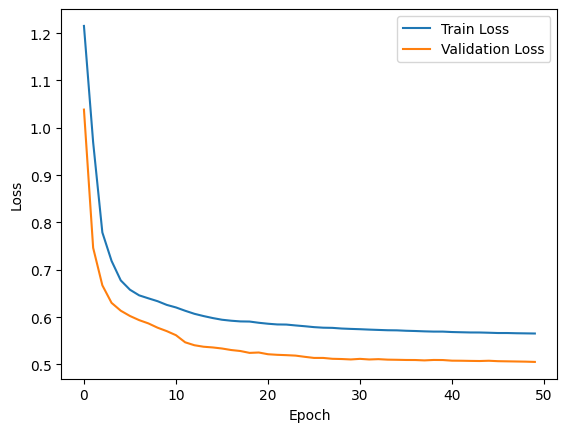

In [7]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
# Define the autoencoder model
input_dim = x_train_scaled.shape[1]

autoencoder2 = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(input_dim, activation='sigmoid')
])
autoencoder2.compile(optimizer='adam', loss='mse')

autoencoder2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               3968      
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 3)                 51        
                                                                 
 dense_19 (Dense)            (None, 16)                64        
                                                                 
 dense_20 (Dense)            (None, 32)               

In [19]:
# Train the autoencoder
history = autoencoder2.fit(x_train_scaled, x_train_scaled, epochs=50, batch_size=32, shuffle=True, validation_data=(x_test_scaled, x_test_scaled))

Epoch 1/50
15/15 [==============================] - 1s 13ms/step - loss: 1.2442 - val_loss: 1.1377
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 1.2040 - val_loss: 1.0584
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 1.1018 - val_loss: 0.9137
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.8772 - val_loss: 0.6892
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.7685 - val_loss: 0.6734
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.7556 - val_loss: 0.6610
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.7439 - val_loss: 0.6508
Epoch 8/50
15/15 [==============================] - 0s 4ms/step - loss: 0.7316 - val_loss: 0.6470
Epoch 9/50
15/15 [==============================] - 0s 5ms/step - loss: 0.7206 - val_loss: 0.6380
Epoch 10/50
15/15 [==============================] - 0s 5ms/step - loss: 0.7037 - val_loss: 0.6311
Epoch 11/50
15/15 

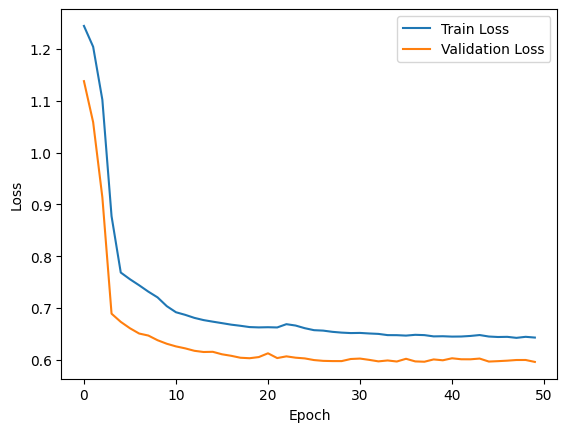

In [20]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
# Define the autoencoder model
input_dim = x_train_scaled.shape[1]

autoencoder3 = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(30, activation='relu'),
    layers.Dense(15, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(3, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(15, activation='relu'),
    layers.Dense(30, activation='relu'),
    layers.Dense(input_dim, activation='sigmoid')
])
autoencoder3.compile(optimizer='adam', loss='mse')

autoencoder3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 30)                930       
                                                                 
 dense_35 (Dense)            (None, 15)                465       
                                                                 
 dense_36 (Dense)            (None, 8)                 128       
                                                                 
 dense_37 (Dense)            (None, 3)                 27        
                                                                 
 dense_38 (Dense)            (None, 8)                 32        
                                                                 
 dense_39 (Dense)            (None, 15)                135       
                                                                 
 dense_40 (Dense)            (None, 30)               

In [27]:
# Train the autoencoder
history = autoencoder3.fit(x_train_scaled, x_train_scaled, epochs=50, batch_size=32, shuffle=True, validation_data=(x_test_scaled, x_test_scaled))

Epoch 1/50
15/15 [==============================] - 1s 11ms/step - loss: 1.2453 - val_loss: 1.1444
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 1.2194 - val_loss: 1.1020
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 1.1379 - val_loss: 0.9873
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.9872 - val_loss: 0.8505
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.8843 - val_loss: 0.7946
Epoch 6/50
15/15 [==============================] - 0s 5ms/step - loss: 0.8546 - val_loss: 0.7814
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.8467 - val_loss: 0.7742
Epoch 8/50
15/15 [==============================] - 0s 3ms/step - loss: 0.8416 - val_loss: 0.7695
Epoch 9/50
15/15 [==============================] - 0s 3ms/step - loss: 0.8376 - val_loss: 0.7655
Epoch 10/50
15/15 [==============================] - 0s 4ms/step - loss: 0.8343 - val_loss: 0.7621
Epoch 11/50
15/15 

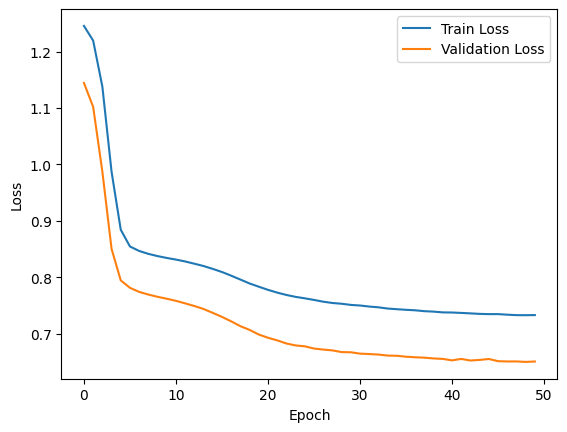

In [28]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

4/4 [==============================] - 0s 3ms/step


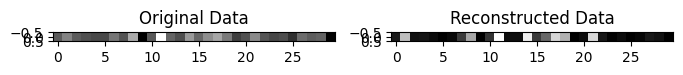

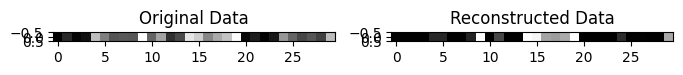

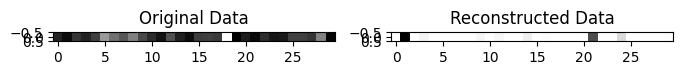

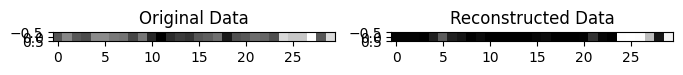

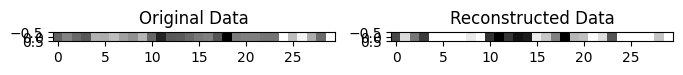

In [ ]:
# Reconstruct data using the trained autoencoder
reconstructed_data = autoencoder.predict(x_test_scaled)

# Choose random indices to visualize samples
sample_indices = np.random.choice(range(len(x_test)), size=5, replace=False)

# Plot original and reconstructed data for selected samples
for idx in sample_indices:
    plt.figure(figsize=(8, 4))

    # Original data
    plt.subplot(1, 2, 1)
    plt.imshow(np.reshape(x_test_scaled[idx], (1, -1)), cmap='gray')
    plt.title('Original Data')

    # Reconstructed data
    plt.subplot(1, 2, 2)
    plt.imshow(np.reshape(reconstructed_data[idx], (1, -1)), cmap='gray')
    plt.title('Reconstructed Data')

    plt.show()

now we use k-means and the input is the output of latent layer of autoencoder

18/18 [==============================] - 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering Accuracy: 0.1827768014059754
Precision: 0.3211920529801324
Recall: 0.27170868347338933
F1 Score: 0.2943854324734446
Confusion Matrix:
[[  7 205]
 [260  97]]


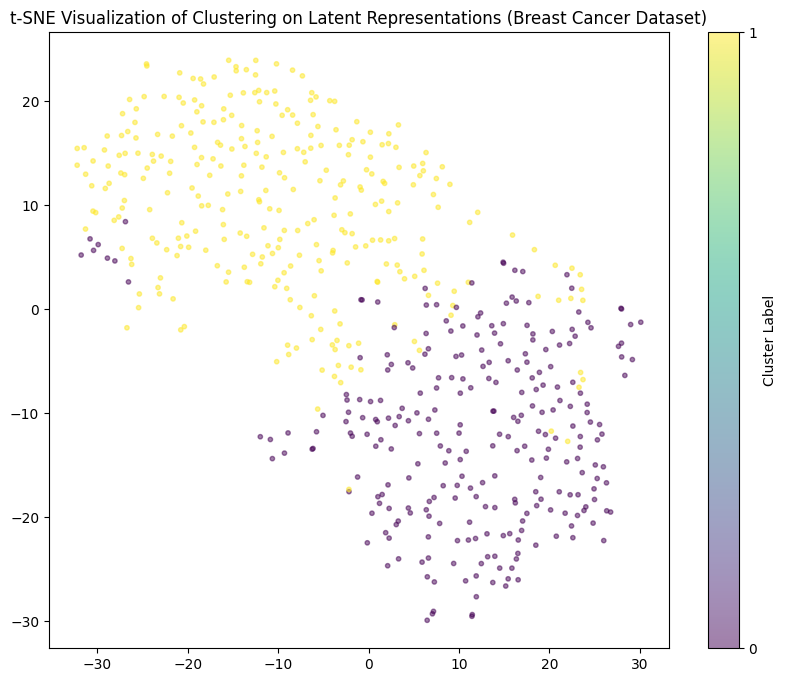

In [25]:
# Extract features from the latent layer
latent_features = autoencoder.layers[3].output

# Define a new model with the latent layer as output
feature_model = keras.Model(inputs=autoencoder.input, outputs=latent_features)

latent_test = feature_model.predict(data_scaled)

# Use K-Means clustering on the latent representations
kmeans = KMeans(n_clusters=2, random_state=42)
clustered_labels = kmeans.fit_predict(latent_test)

# Apply t-SNE to reduce dimensionality for visualization
tsne = TSNE(n_components=2, random_state=42)
embedded = tsne.fit_transform(latent_test)

# labels = y_test

# Calculate additional evaluation metrics
accuracy = accuracy_score(labels, clustered_labels)
precision = precision_score(labels, clustered_labels)
recall = recall_score(labels, clustered_labels)
f1 = f1_score(labels, clustered_labels)
conf_matrix = confusion_matrix(labels, clustered_labels)

# Print the evaluation metrics
print("Clustering Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
# | TN  FP |
# | FN  TP |

# Plot the clustered points
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedded[:, 0], embedded[:, 1], c=clustered_labels, cmap='viridis', s=10, alpha=0.5)
plt.title('t-SNE Visualization of Clustering on Latent Representations (Breast Cancer Dataset)')
plt.colorbar(scatter, ticks=range(2), label='Cluster Label')
plt.show()

این نتیجه خوشه بندی روی کل داده ها با خروجی اتوانکدر که لایه ها به صورت زیر بود:

    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(30, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),

18/18 [==============================] - 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering Accuracy: 0.6783831282952548
Precision: 0.7111650485436893
Recall: 0.8207282913165266
F1 Score: 0.7620286085825748
Confusion Matrix:
[[ 93 119]
 [ 64 293]]


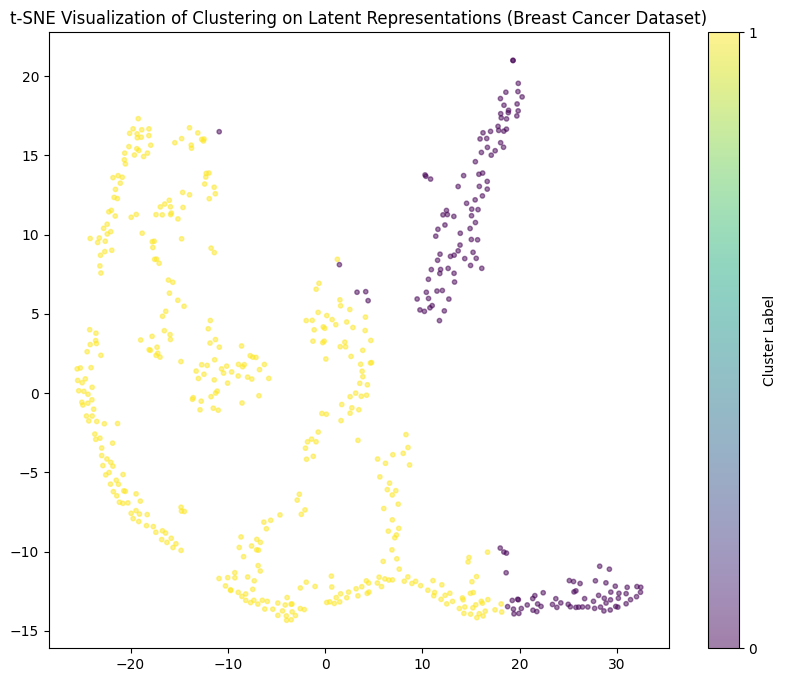

In [21]:
# Extract features from the latent layer
latent_features = autoencoder2.layers[5].output

# Define a new model with the latent layer as output
feature_model = keras.Model(inputs=autoencoder2.input, outputs=latent_features)

latent_test = feature_model.predict(data_scaled)

# Use K-Means clustering on the latent representations
kmeans = KMeans(n_clusters=2, random_state=42)
clustered_labels = kmeans.fit_predict(latent_test)

# Apply t-SNE to reduce dimensionality for visualization
tsne = TSNE(n_components=2, random_state=42)
embedded = tsne.fit_transform(latent_test)

# Calculate additional evaluation metrics
accuracy = accuracy_score(labels, clustered_labels)
precision = precision_score(labels, clustered_labels)
recall = recall_score(labels, clustered_labels)
f1 = f1_score(labels, clustered_labels)
conf_matrix = confusion_matrix(labels, clustered_labels)

# Print the evaluation metrics
print("Clustering Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
# | TN  FP |
# | FN  TP |

# Plot the clustered points
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedded[:, 0], embedded[:, 1], c=clustered_labels, cmap='viridis', s=10, alpha=0.5)
plt.title('t-SNE Visualization of Clustering on Latent Representations (Breast Cancer Dataset)')
plt.colorbar(scatter, ticks=range(2), label='Cluster Label')
plt.show()

لایه ها به صورت:

    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),    
    layers.Dense(3, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),

18/18 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering Accuracy: 0.827768014059754
Precision: 0.9850187265917603
Recall: 0.7366946778711485
F1 Score: 0.842948717948718
Confusion Matrix:
[[208   4]
 [ 94 263]]


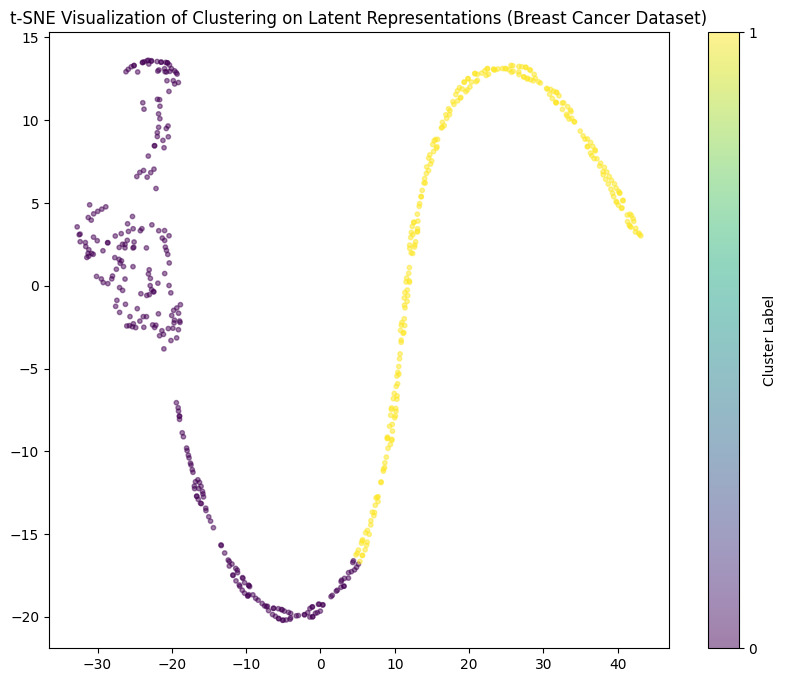

In [29]:
# Extract features from the latent layer
latent_features = autoencoder3.layers[5].output

# Define a new model with the latent layer as output
feature_model = keras.Model(inputs=autoencoder3.input, outputs=latent_features)

latent_test = feature_model.predict(data_scaled)

# Use K-Means clustering on the latent representations
kmeans = KMeans(n_clusters=2, random_state=42)
clustered_labels = kmeans.fit_predict(latent_test)

# Apply t-SNE to reduce dimensionality for visualization
tsne = TSNE(n_components=2, random_state=42)
embedded = tsne.fit_transform(latent_test)

# Calculate additional evaluation metrics
accuracy = accuracy_score(labels, clustered_labels)
precision = precision_score(labels, clustered_labels)
recall = recall_score(labels, clustered_labels)
f1 = f1_score(labels, clustered_labels)
conf_matrix = confusion_matrix(labels, clustered_labels)

# Print the evaluation metrics
print("Clustering Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
# | TN  FP |
# | FN  TP |

# Plot the clustered points
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedded[:, 0], embedded[:, 1], c=clustered_labels, cmap='viridis', s=10, alpha=0.5)
plt.title('t-SNE Visualization of Clustering on Latent Representations (Breast Cancer Dataset)')
plt.colorbar(scatter, ticks=range(2), label='Cluster Label')
plt.show()

لایه ها به صورت:

    layers.Dense(30, activation='relu'),
    layers.Dense(15, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(3, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(15, activation='relu'),
    layers.Dense(30, activation='relu'),

    که نتیحه 83% دقت رو داره که از همه بهتر است.